## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [ ]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

In [ ]:
ha["sex"] = ha["sex"].astype("str")
ha["cp"] = ha["cp"].astype("str")
ha["restecg"] = ha["restecg"].astype("str")

In [ ]:
X = ha[['age', 'chol']]
y = ha['output']

In [ ]:
lg = LogisticRegression().fit(X,y)

print(lg.coef_, lg.intercept_)

[[-0.05413264 -0.00109632]] [3.36325683]


In [ ]:
(0.05413264*55 - 3.36325683) / (-0.00109632)

352.05198299766465

In [ ]:
b0_lg = lg.intercept_[0]
b_age_lg, b_chol_lg = lg.coef_[0]

chol_55_lg = -(b0_lg + b_age_lg * 55) / b_chol_lg
chol_55_lg

np.float64(352.05074305914326)

A 55 year old would have to have a cholestorol of 352.052 for the doctors to predict heart disease is present.

In [ ]:
logit_90 = np.log(0.9 / 0.1)
chol_90 = -(logit_90 - b0_lg - b_age_lg * 55) / b_chol_lg
chol_90

np.float64(1652.1237900606639)

For a 55-year old, the cholesterol level that would estimate a 90% chance of heart disease present is 1652.12.

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

b_age_lda, b_chol_lda = lda.coef_[0]
b0_lda = lda.intercept_[0]

chol_55_lda = -(b0_lda + b_age_lda * 55) / b_chol_lda

chol_55_lda

np.float64(351.8417023084646)

For a 55-year old, cholesterol would bee to be at levels 351.84 or higher for the doctors to predict heart disease in present.

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X, y)

b_age_svc, b_chol_svc = svc.coef_[0]
b0_svc = svc.intercept_[0]

chol_55_svc = -(b0_svc + b_age_svc * 55) / b_chol_svc
chol_55_svc

np.float64(238.9576168389195)

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

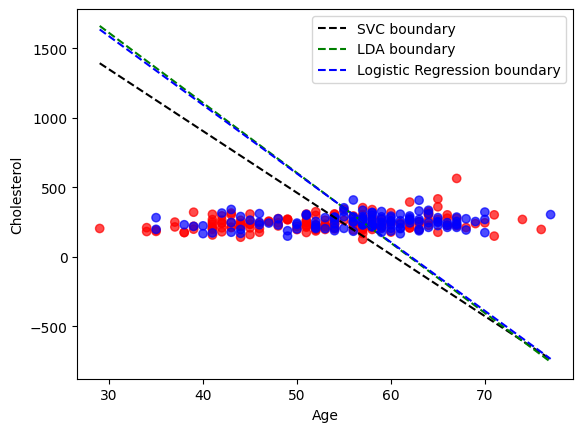

In [ ]:
plt.scatter(X['age'], X['chol'], c=y, cmap='bwr', alpha=0.7)

age_vals_svc = np.linspace(X['age'].min(), X['age'].max(), 200)
chol_boundary_svc = -(b0_svc + b_age_svc * age_vals_svc) / b_chol_svc
plt.plot(age_vals_svc, chol_boundary_svc, 'k--', label='SVC boundary')

age_vals_lda = np.linspace(X['age'].min(), X['age'].max(), 200)
chol_boundary_lda = -(b0_lda + b_age_lda * age_vals_lda) / b_chol_lda
plt.plot(age_vals_lda, chol_boundary_lda, 'g--', label='LDA boundary')

age_vals_lg = np.linspace(X['age'].min(), X['age'].max(), 200)
chol_boundary_lg = -(b0_lg + b_age_lg * age_vals_lg) / b_chol_lg
plt.plot(age_vals_lg, chol_boundary_lg, 'b--', label='Logistic Regression boundary')

plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.legend()
plt.show()